In [90]:
import pickle
import os
import numpy as np
origin = "./denoised_img"
# filenames = ["n2n_lessthan50_URBAN100-5","n2n_lessthan50_SET12","n2n_lessthan50_BSD68"]
# filenames = ["n2n_lessthan10_URBAN100","n2n_lessthan10_SET12","n2n_lessthan10_BSD68"] #sigma fix
# filenames = ["n2n_lessthan50_URBAN100-3","n2n_lessthan50_SET12","n2n_lessthan50_BSD68"]
# filenames = ["n2n_lessthan10_URBAN100","n2n_lessthan10_SET12","n2n_lessthan10_BSD68"] #sigma change

# filenames = ["50_knownsigma_URBAN100","50_knownsigma_SET12","50_knownsigma_BSD68"]
filenames = ["50_unknownsigma_URBAN100","50_unknownsigma_SET12","50_unknownsigma_BSD68"]
metrics=[]
for i, filename in enumerate(filenames):
    pth = os.path.join(origin,filenames[i],"metric.pickle")
    with open(pth, 'rb') as handle:
        data = pickle.load(handle)
    metrics.append(data)
print(np.argmax(np.array(metrics[0]["PSNR"]))+1)

23


In [83]:
def postprocess(psnr_array):
    for i in range(len(psnr_array)):
        if i==0:
            if psnr_array[i] == 0:
                psnr_array[i] = 50
        if psnr_array[i] == 0:
            psnr_array[i] = psnr_array[i - 1]
    return psnr_array

def postprocess2(psnr_array):
    for i in range(len(psnr_array)):
        if i==0:
            if psnr_array[i] == 0:
                psnr_array[i] = 1
        if psnr_array[i] == 0:
            psnr_array[i] = psnr_array[i - 1]
    return psnr_array

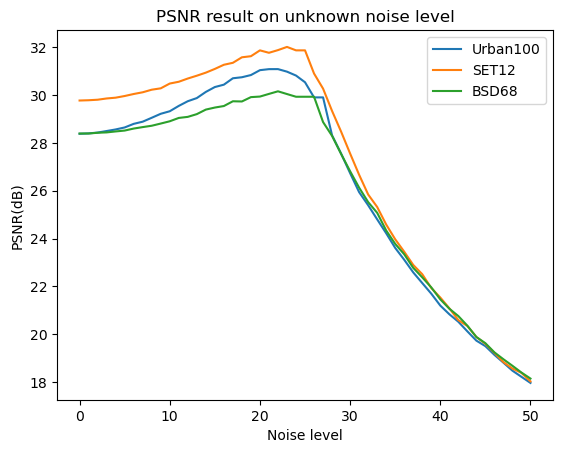

In [98]:
### unknown sigma psnr
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(postprocess(metrics[0]["PSNR"]),label="Urban100")
ax1.plot(postprocess(metrics[1]["PSNR"]),label="SET12")
ax1.plot(postprocess(metrics[2]["PSNR"]),label="BSD68")
ax1.set_ylabel('PSNR(dB)')
ax1.set_xlabel('Noise level')
ax1.tick_params(axis='y')

# ax2 = ax1.twinx() ## two axis
# ax2.plot(postprocess(metrics[0]["SSIM"]),label="Urban100")
# ax2.plot(postprocess(metrics[1]["SSIM"]),label="SET12")
# ax2.plot(postprocess(metrics[2]["SSIM"]),label="BSD68")
# ax2.set_ylabel('SSIM')
# ax2.tick_params(axis='y')
# ax2.set_ylim(0, 1.1)

plt.title('PSNR result on unknown noise level')
plt.legend()
plt.savefig('PSNR_unKnownNoise.png')
plt.show()


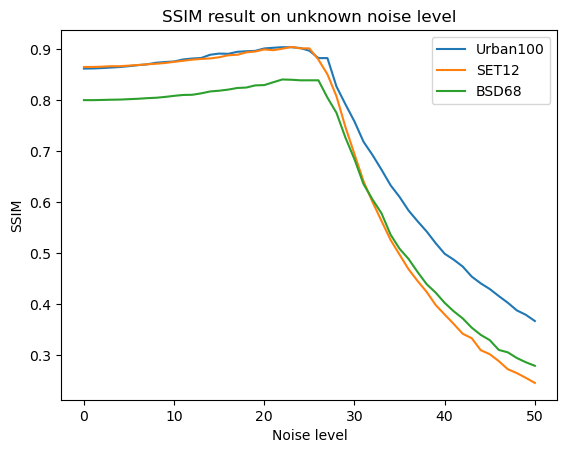

In [99]:
### unknown sigma ssim
fig, ax1 = plt.subplots()
ax1.plot(postprocess2(metrics[0]["SSIM"]),label="Urban100")
ax1.plot(postprocess2(metrics[1]["SSIM"]),label="SET12")
ax1.plot(postprocess2(metrics[2]["SSIM"]),label="BSD68")
ax1.set_ylabel('SSIM')
ax1.set_xlabel('Noise level')
ax1.tick_params(axis='y')
plt.title('SSIM result on unknown noise level')
plt.legend()
plt.savefig('SSIM_unKnownNoise.png')
plt.show()

In [100]:
filenames = ["50_knownsigma_URBAN100","50_knownsigma_SET12","50_knownsigma_BSD68"]
metrics=[]
for i, filename in enumerate(filenames):
    pth = os.path.join(origin,filenames[i],"metric.pickle")
    with open(pth, 'rb') as handle:
        data = pickle.load(handle)
    metrics.append(data)
print(np.argmax(np.array(metrics[0]["PSNR"]))+1)

1


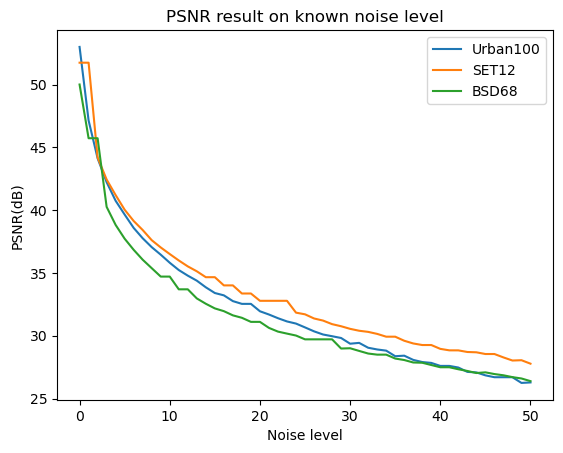

In [101]:
### known sigma psnr
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(postprocess(metrics[0]["PSNR"]),label="Urban100")
ax1.plot(postprocess(metrics[1]["PSNR"]),label="SET12")
ax1.plot(postprocess(metrics[2]["PSNR"]),label="BSD68")
ax1.set_ylabel('PSNR(dB)')
ax1.set_xlabel('Noise level')
ax1.tick_params(axis='y')

plt.title('PSNR result on known noise level')
plt.legend()
plt.savefig('PSNR_KnownNoise.png')
plt.show()


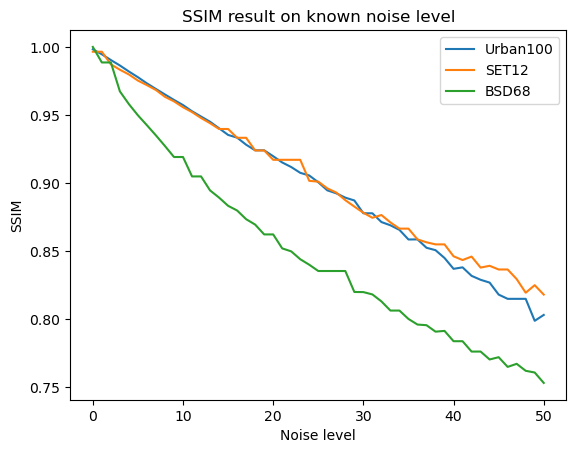

In [104]:
### known sigma ssim
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(postprocess2(metrics[0]["SSIM"]),label="Urban100")
ax1.plot(postprocess2(metrics[1]["SSIM"]),label="SET12")
ax1.plot(postprocess2(metrics[2]["SSIM"]),label="BSD68")
ax1.set_ylabel('SSIM')
ax1.set_xlabel('Noise level')
ax1.tick_params(axis='y')

plt.title('SSIM result on known noise level')
plt.legend()
plt.savefig('SSIM_KnownNoise.png')
plt.show()

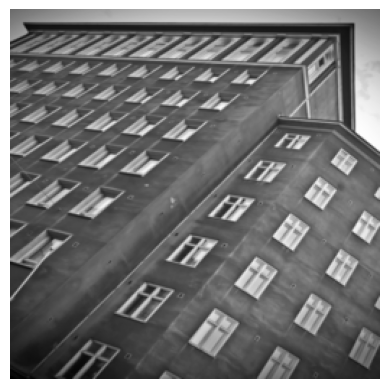

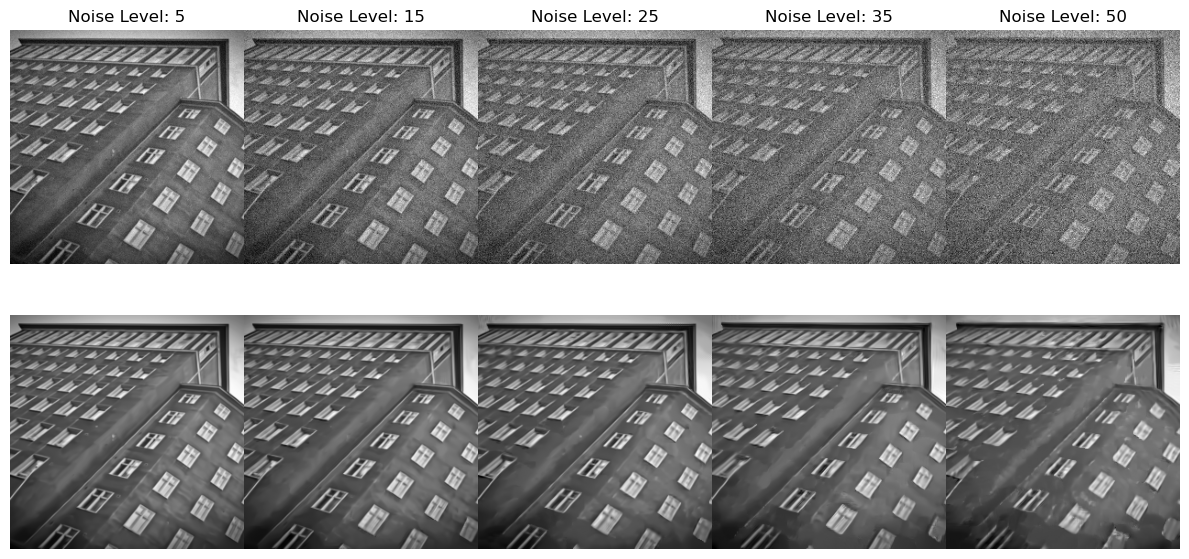

In [103]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision.transforms.functional import rgb_to_grayscale, resize

path = "./test_images/URBAN100.png"
noise = [5, 15, 25, 35, 50]

img = read_image(path).float().to("cpu")
img = rgb_to_grayscale(img)
img = resize(img, [256, 256])
plt.imshow(img.permute(1, 2, 0).numpy(), cmap='gray')

plt.axis('off')
plt.savefig("originalimg")
plt.show()
noisy_images = [img + n * torch.randn_like(img) for n in noise]

loaded_images = []
for n in noise:
    pth = os.path.join(origin, filenames[0], f"{n}.png")
    img_loaded = read_image(pth).float().to("cpu")
    img_loaded = rgb_to_grayscale(img_loaded)
    img_loaded = resize(img_loaded, [256, 256])
    loaded_images.append(img_loaded)

fig, axes = plt.subplots(2, 5, figsize=(12, 6), gridspec_kw={'wspace': 0, 'hspace': 0})
for idx in range(5):

    noisy_np = noisy_images[idx].permute(1, 2, 0).numpy()
    axes[0, idx].imshow(noisy_np, cmap='gray')
    axes[0, idx].set_title(f"Noise Level: {noise[idx]}")
    axes[0, idx].axis('off')

    loaded_np = loaded_images[idx].permute(1, 2, 0).numpy()
    axes[1, idx].imshow(loaded_np, cmap='gray')
    # axes[1, idx].set_title(f"Denoised {noise[idx]}")
    axes[1, idx].axis('off')

plt.tight_layout()
plt.savefig('unknownNoiseImages.png')
plt.show()


In [69]:
from lichi import LIChI
from torchvision.io import read_image, write_png
path = "/Users/yangtaewon/Workspace/LIChI/test_images/0.png"

In [94]:
img = read_image(path)[None, :, :, :].float().to("cpu")
img = rgb_to_grayscale(img)
img = resize(img, [256, 256])
rand_sig = torch.randint(low=0, high=50, size=(1,))
img_noisy = img+rand_sig*torch.randn_like(img)

In [101]:
img_np = img_noisy.numpy()
img_np[0][0].shape

(256, 256)

Text(0.5, 1.0, '32')

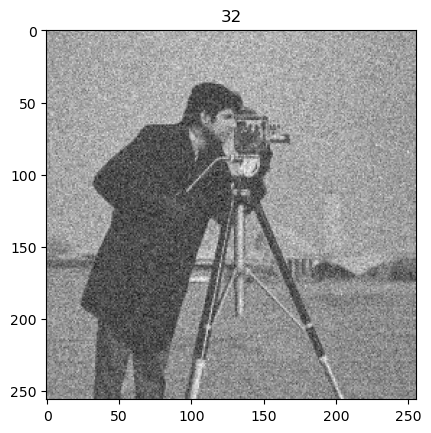

In [103]:
plt.imshow(img_np[0][0],cmap='gray')
plt.title(rand_sig.numpy()[0])

In [104]:
model = LIChI()
den = model(img_noisy, sigma=25, constraints='affine', method='n2n', p1=13, p2=6, k1=16, k2=64, w=65, s=3, M=11)

In [105]:
den = den.clip(0, 255)
psnr = 10*torch.log10(255**2 / torch.mean((den - img)**2))
print("PSNR:", round(float(psnr), 2), "dB")

PSNR: 26.57 dB


In [3]:
import time
import torch
import matplotlib.pyplot as plt

from lichi import LIChI
from torchvision.io import read_image, write_png

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
sigma = 30
path_in = './test_images/0.png'

# Read image and Add noise
img = read_image(path_in)[None, :, :, :].float().to(device)
img_noisy = img + sigma * torch.randn_like(img)

In [4]:
def lichi(img_noisy, sigma):
    model = LIChI()
    if sigma <= 10:
        img_lichi = model(img_noisy, sigma=sigma, constraints='affine', method='n2n', p1=9, p2=6, k1=16, k2=64, w=65, s=3, M=6)
    elif sigma <= 30:
        img_lichi = model(img_noisy, sigma=sigma, constraints='affine', method='n2n', p1=11, p2=6, k1=16, k2=64, w=65, s=3, M=9)
    else:
        img_lichi = model(img_noisy, sigma=sigma, constraints='affine', method='n2n', p1=13, p2=6, k1=16, k2=64, w=65, s=3, M=11)
    img_lichi = img_lichi.clip(0, 255)
    return img_lichi

def LR(img_noisy, threshold=0.99):
    img_noisy = torch.squeeze(img_noisy)
    U, S, Vh = torch.linalg.svd(img_noisy, full_matrices=False)
    energy_total = torch.sum(S**2)
    energy_cumulative = torch.cumsum(S**2, dim=0)
    energy_threshold = threshold * energy_total
    k = torch.searchsorted(energy_cumulative, energy_threshold).item()+1
    U_k = U[:, :k]
    S_k = torch.diag(S[:k])
    Vh_k = Vh[:k, :]
    img_lr = U_k @ S_k @ Vh_k
    img_lr = img_lr.clip(0, 255)
    return img_lr

def im2row(im, img_size, block_size):
    H, W = img_size
    block_h, block_w = block_size

    patch_h = H - block_h + 1
    patch_w = W - block_w + 1
    patch_num = patch_h * patch_w
    block_length = block_h * block_w
    result = torch.zeros((block_length, patch_num))

    patch_idx = 0
    for y in range(patch_w):
        for x in range(patch_h):
            patch = im[x:x+block_h, y:y+block_w]
            result[:, patch_idx] = patch.reshape(-1)
            patch_idx += 1
    return result


def row2im(patches, img_size, block_size):
    H, W = img_size
    block_h, block_w = block_size
    result = torch.zeros((H, W))
    weight = torch.zeros((H, W))

    patch_idx = 0
    for y in range(W-block_w+1):
        for x in range(H-block_h+1):
            patch = patches[:, patch_idx]
            result[x:x+block_h, y:y+block_w] += patch.reshape(8, 8)
            weight[x:x+block_h, y:y+block_w] += 1
            patch_idx += 1
    
    # weight = torch.clamp(weight, min=1e-6)
    result /= weight
    return result

def LLR(img_noisy, k, block_size=[8, 8]):
    img_noisy = torch.squeeze(img_noisy)
    img_size = img_noisy.shape
    patches = im2row(img_noisy, img_size, block_size)
    U, S, Vh = torch.linalg.svd(patches, full_matrices=False)
    U_k = U[:, :k]
    S_k = torch.diag(S[:k])
    Vh_k = Vh[:k, :]
    patch_lr = U_k @ S_k @ Vh_k
    img_llr = row2im(patch_lr, img_size, block_size)
    img_llr = img_llr.clip(0, 255)
    return img_llr

In [5]:
t = time.time()
img_lichi = lichi(img_noisy, sigma)
print("Time elapsed LiChI:", round(time.time() - t, 3), "seconds")
write_png(img_lichi[0, :, :, :].byte().to("cpu"), "./img_lichi.png")

t = time.time()
img_lr = LR(img_noisy)
print("Time elapsed LR:", round(time.time() - t, 3), "seconds")
write_png(img_lr.unsqueeze(0).byte().to("cpu"), "./img_lr.png")

t = time.time()
img_llr = LLR(img_noisy, k=20)
print("Time elapsed LLR:", round(time.time() - t, 3), "seconds")
write_png(img_llr.unsqueeze(0).byte().to("cpu"), "./img_llr.png")

Time elapsed LiChI: 4.689 seconds
Time elapsed LR: 0.011 seconds
Time elapsed LLR: 1.19 seconds
